# 통계적 분석
## 주택가격 예측 데이터 사용

- 상관관계가 큰 변수 찾기
- 결측 처리
- 이상치 처리
- 로그 변환

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
!wget https://goo.gl/oWb4qd -O house.csv

--2019-03-07 01:14:18--  https://goo.gl/oWb4qd
Resolving goo.gl (goo.gl)... 74.125.142.138, 74.125.142.139, 74.125.142.113, ...
Connecting to goo.gl (goo.gl)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/ulc8w5jtalufra2/house-train.csv?dl=1 [following]
--2019-03-07 01:14:19--  https://www.dropbox.com/s/ulc8w5jtalufra2/house-train.csv?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.1, 2620:100:6016:1::a27d:101
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/ulc8w5jtalufra2/house-train.csv [following]
--2019-03-07 01:14:19--  https://www.dropbox.com/s/dl/ulc8w5jtalufra2/house-train.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc976ba72ba913b516584a308cfb.dl.dropboxusercontent.com/cd/0/get/Acnt02Xa4GvQS-Iw_7M-eVKbdRgp

In [0]:
# 아래 캐글 데이터를 다운받아 'data/house_data'폴더에 저장한다
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [3]:
df_train = pd.read_csv('./house.csv')
df_train.columns[:10]

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities'],
      dtype='object')

## 특성값 설명


- SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
- ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale

아래의 변수들이 중요한 역할을 하는 것으로 파악

* OverallQual
* YearBuilt.
* TotalBsmtSF.
* GrLivArea.



In [4]:
# 목적 변수의 통계적 특성
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

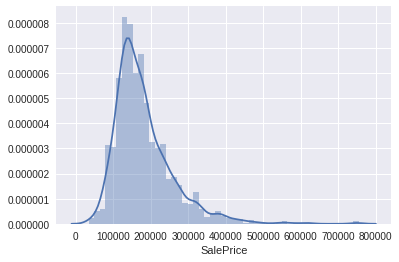

In [5]:
# 히스토그램
sns.distplot(df_train['SalePrice']);

다음과 같은 특성을 발견할 수 있다.

* *<b>Deviate from the normal distribution.</b>*
* *<b>Have appreciable positive skewness.</b>*
* *<b>Show peakedness.</b>*

In [6]:
#skewness and kurtosis
print("Skewness: %f" % df_train['SalePrice'].skew())
print("Kurtosis: %f" % df_train['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


### 변수의 관계 파악

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


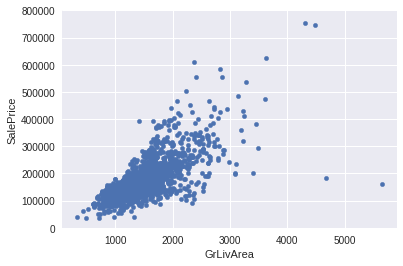

In [7]:
# 산포도 grlivarea/saleprice
# 관련성이 높은 것으로 보인다
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [8]:
data.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


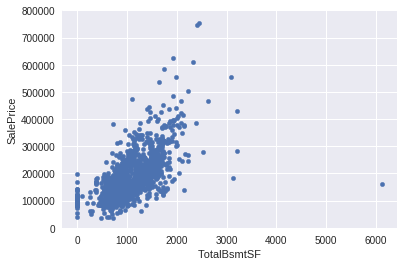

In [9]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

### 카테고리 변수와의 관계: 박스플롯

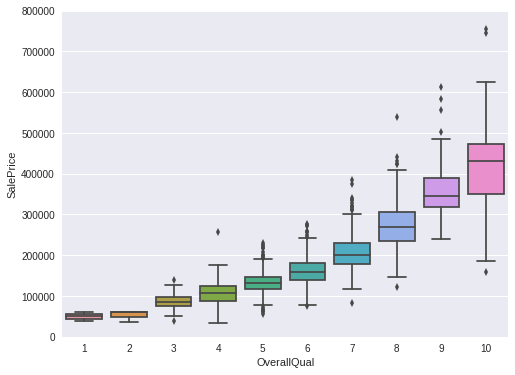

In [10]:
# 박스플롯 overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

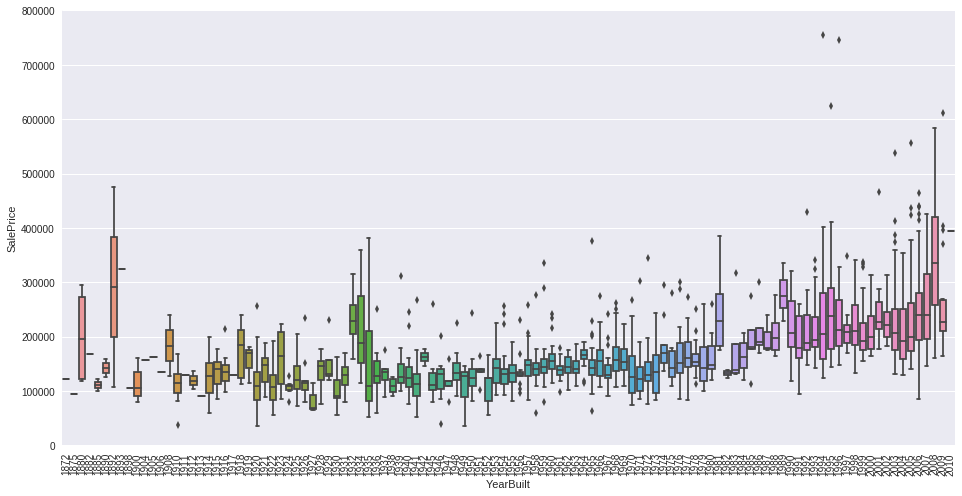

In [11]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

약한 관련성이 있으며 최근의 주택 가격이 높다. 인플레이션이 반영된 가격일 수도 있다.
유용한 특성을 선택하는 것이 문제이다. 이러한 특성 선택을 임의로 주관적으로 수행하는 것은 한계가 있다. 객관적인 방법이 필요하다.

- Correlation matrix (heatmap style).
- 'SalePrice' correlation matrix (zoomed heatmap style).
- Scatter plots between the most correlated variables

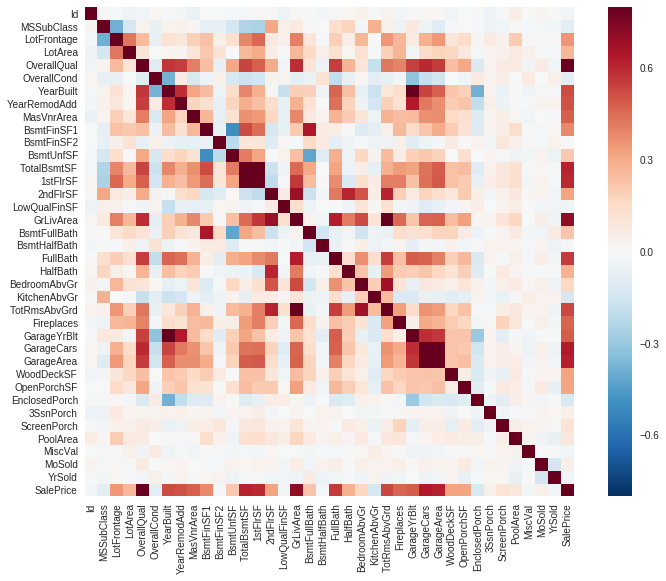

In [12]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

히트맵 타입의 상관관계 지도는 유용하다. 그림을 보면 'TotalBsmtSF', '1stFlrSF', 'GarageX' 등의 상관관계가 큰 것을 알 수 있다. 경우에 따라서는 두개의 특성이 거의 동일한 정보를 포함하는 것도 있다.

가장 중요한 것은 'SalePrice'와의 상관관계이다. 이를 보면 'GrLivArea', 'TotalBsmtSF', 'OverallQual'가 관련이 많은 것을 알 수 있다. 다른 특성들도 일부 관련이 있으므로 무시할 수 없다.

#### 'SalePrice' correlation matrix (zoomed heatmap style)

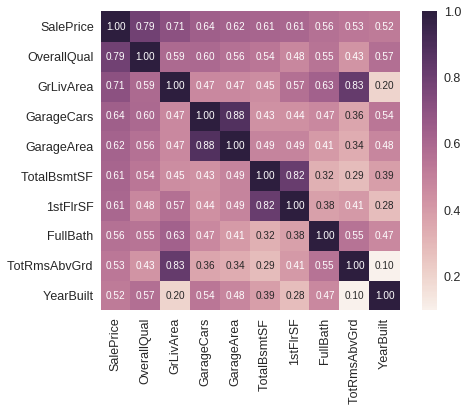

In [14]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, 
        square=True, fmt='.2f', annot_kws={'size': 10}, 
        yticklabels=cols.values, xticklabels=cols.values)
plt.show()

상관관계가 높은 순으로 정렬했다.

* 'OverallQual', 'GrLivArea' and 'TotalBsmtSF'은 'SalePrice'와 상관관계가 크다.
* 'GarageCars' and 'GarageArea' 특성은 같은 의미를 갖는 것으로 보인다 (상관관계 0.88).
* 'TotalBsmtSF' and '1stFloor' 도 상관관계가 크다. (0.82)
* 'FullBath'?? Really? 
* 'TotRmsAbvGrd' and 'GrLivArea' 도 상관관계가 크다(0.83).

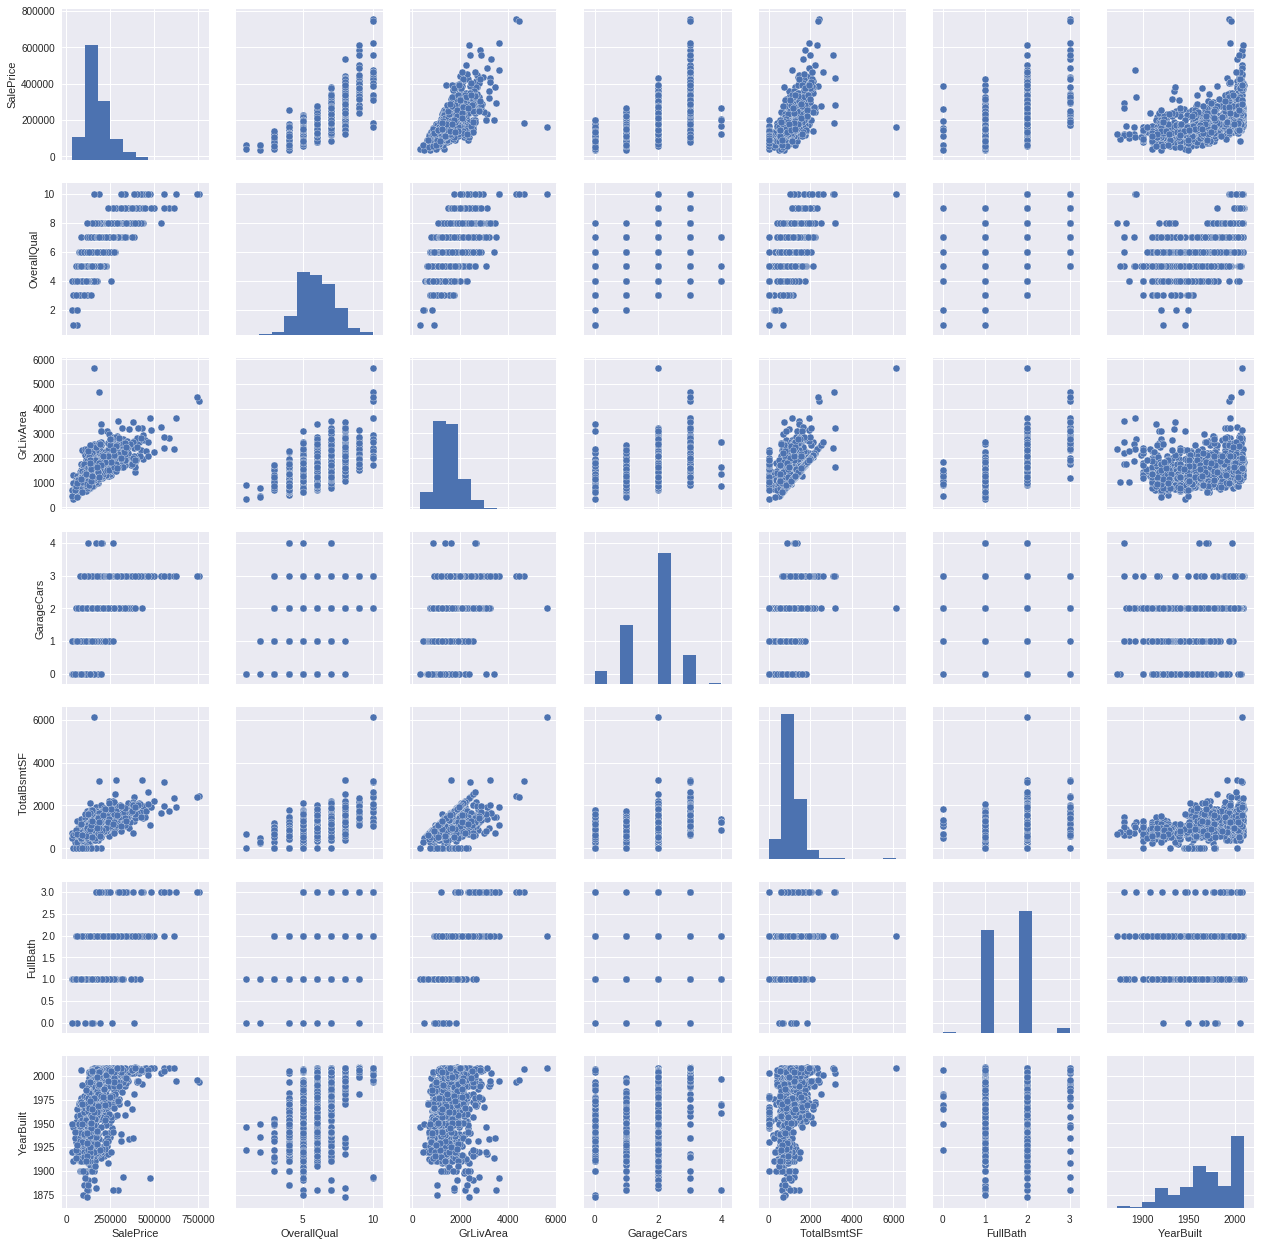

In [15]:
# 산포도
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 
  'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show();

'TotalBsmtSF' and 'GrLiveArea'이 의미 있게 보인다. 산포도를 보면 직선의 한 쪽에 집중해서 나타나는 것을 알 수 있다. 지하실의 크기는 1층의 면적과 거의 같거나 작다.

'YearBuilt'도 약한 지수함수 형태를 보인다. 가격이 계속 오르고 있다.

# 결측치 처리

결측 패턴이 산발적인가, 규칙적인가?

In [13]:
#missing data
total = df_train.isnull().sum().sort_values(ascending=False)
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


결측률이 15% 이상이면 이 특성은 제외하고 분석하는 것이 타당하다.('PoolQC', 'MiscFeature', 'Alley' 등) 이러한 데이터의 중요도도 생각해봐야 한다. 

'Garage*X*'의 결측치 비율이 같고, 중복성이 있다.'Bsmt*X*' 특성도 마찬가지

'MasVnrArea' and 'MasVnrType'는'YearBuilt'나 'OverallQual' 와 상관과계가 크므로 중복성이 있어 제외 가능하다.

'Electrical'는 한 값만 결측이므로 해당 샘플만 제거한다.

'Electrical' 외의 결측치를 관찰한 결과 모두 특성에서 제외하기로 한다. 

In [0]:
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() 

0

# 특이값(outlier)

중요한 의미나 정보를 포함할 수 있다. 표준편차나 산포도에서 찾을 수 있다.

표준 정규화를 하여 비교한다. 상위 영역에 7 이상의 표준편차 차이가 있는 것을 알 수 있다.

In [0]:
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:,np.newaxis]);
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range= saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

outer range (high) of the distribution:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


### Bivariate 분석

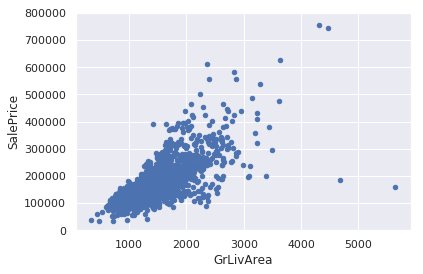

In [0]:
#bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)

data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

우측의 두 점은 트렌드를 따르지 않는 값으로 여기서는 삭제한다. 상위의 두 점은 7~ 값을 갖는 케이스인데 트렌드를 따르므로 삭제하지 않는다.

In [0]:
#deleting points
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

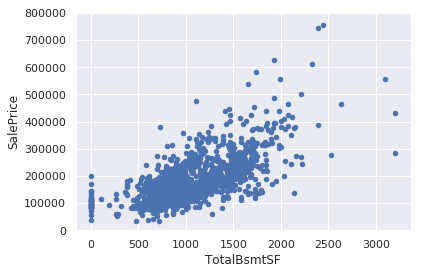

In [0]:
#bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

우측의 이상치가 있어 보이지만 그대로 둔다.

# 다음 단계

점검할 사항:

- 정규성
- 등분산성
- 선형관계성
- 상호 연관된 오류의 부재

### In the search for normality

- 히스토그램: Kurtosis and skewness (첨도 및 왜도) 점검
- Normal probability plot

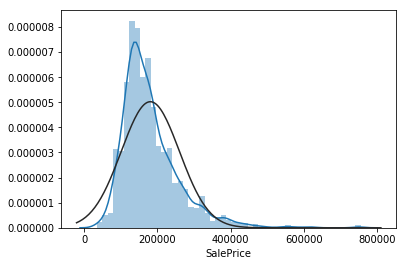

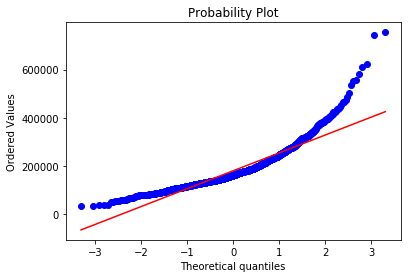

In [0]:
# 히스토그램과 정규분포 플롯
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

'SalePrice'는 정규분포는 아니다. 정점(peakedness)이 존재하고 양의 왜곡(positive skewness)를 보인다. 양의 왜곡에는 로그 변환을 하면 도움이 된다. 

In [0]:
# 로그변환
df_train['SalePrice'] = np.log(df_train['SalePrice'])

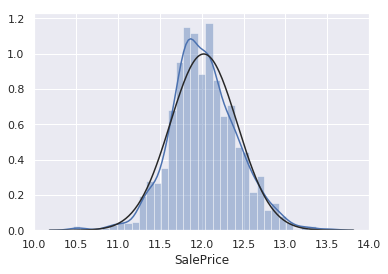

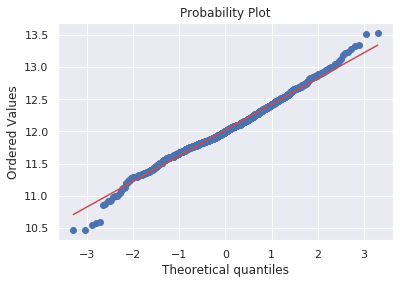

In [0]:
sns.distplot(df_train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot=plt)

'GrLivArea'에 대해서 알아보겠다.

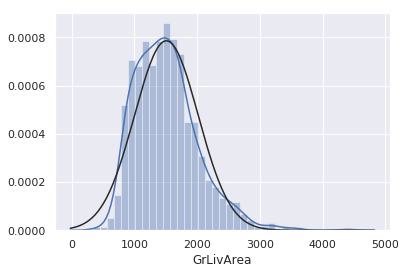

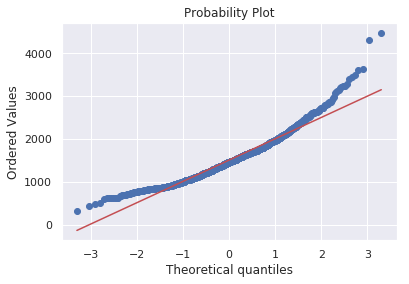

In [0]:
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [0]:
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

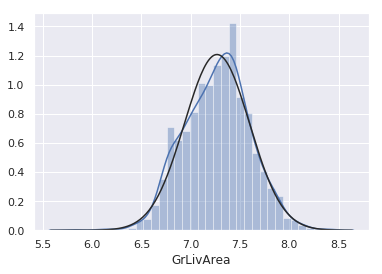

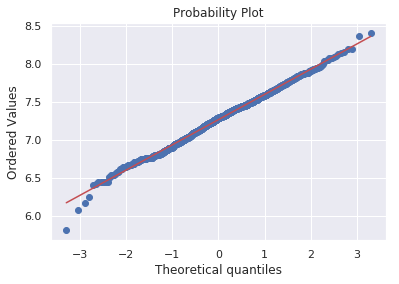

In [0]:
# 로그 변환 후 플롯
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

TotalBsmtSF 변수에 대한 그래프

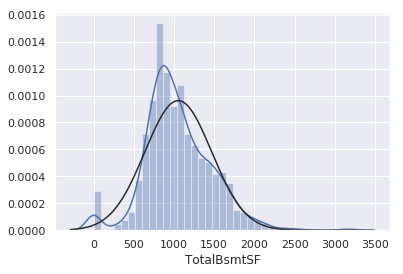

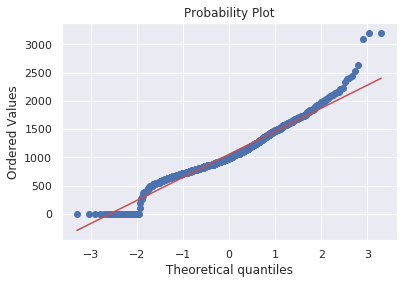

In [0]:
#histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot=plt)

값이 0인 것은 로그 변환을 할 수 없다. 0인 경우는 '지하실 없음' 등으로 표현하고 0 이상인 값에 대해서만 로그 변환을 할 수 있다.

In [0]:
# 별도의 컬럼 추가
# area>0 이면 1, for area==0 이면 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0 
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] = 1

In [0]:
# 양수인 경우 로그 변환
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

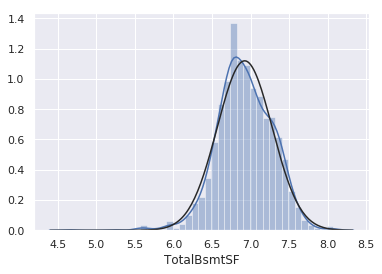

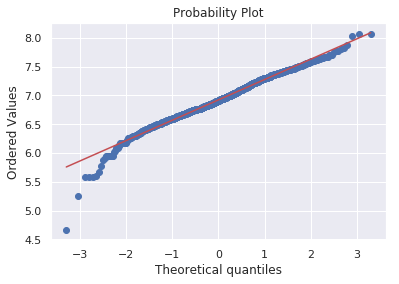

In [0]:
# 히스토그램
sns.distplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], plot=plt)

### homoscedasticity (동질학)
- 산포도로 확인할 수 있다.

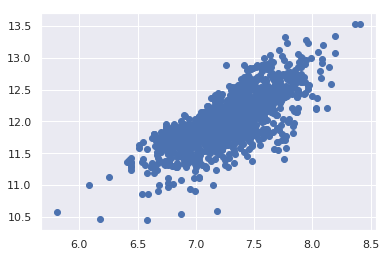

In [0]:
#scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

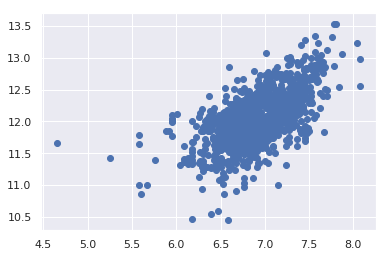

In [0]:
#scatter plot
plt.scatter(df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF']>0]['SalePrice']);